<a href="https://colab.research.google.com/github/ahmeda335/Analysing-Student-Grades-Performance-Dataset/blob/main/Students_Grading_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔍🔍Cleaning dataset of a Students-Gradings and extracting insights from it.

# **Step 1️⃣:** Load the dataset and explore its structure.

## Importing necessary libraries and reading the data.

In [ ]:
# importing related libraries.
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the data.
df = pd.read_csv('/content/Students_Grading_Dataset.csv')

In [ ]:
df.head()

Student_ID First_Name Last_Name                    Email  Gender  Age  \
0      S1000       Omar  Williams  student0@university.com  Female   22   
1      S1001      Maria     Brown  student1@university.com    Male   18   
2      S1002      Ahmed     Jones  student2@university.com    Male   24   
3      S1003       Omar  Williams  student3@university.com  Female   24   
4      S1004       John     Smith  student4@university.com  Female   23   

    Department  Attendance (%)  Midterm_Score  Final_Score  ...  \
0  Engineering           52.29          55.03        57.82  ...   
1  Engineering           97.27          97.23        45.80  ...   
2     Business           57.19          67.05        93.68  ...   
3  Mathematics           95.15          47.79        80.63  ...   
4           CS           54.18          46.59        78.89  ...   

   Projects_Score  Total_Score  Grade  Study_Hours_per_Week  \
0           85.90        56.09      F                   6.2   
1           55.65        50.64      A                  19.0   
2           73.79        70.30      D                  20.7   
3           92.12        61.63      A                  24.8   
4           68.42        66.13      F                  15.4   

   Extracurricular_Activities Internet_Access_at_Home  Parent_Education_Level  \
0                          No                     Yes             High School   
1                          No                     Yes                     NaN   
2                          No                     Yes                Master's   
3                         Yes                     Yes             High School   
4                         Yes                     Yes             High School   

  Family_Income_Level Stress_Level (1-10) Sleep_Hours_per_Night  
0              Medium                   5                   4.7  
1              Medium                   4                   9.0  
2                 Low                   6                   6.2  
3                High                   3                   6.7  
4                High                   2                   7.1  

[5 rows x 23 columns]

In [ ]:
# Information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [ ]:
# Describing the data like count, mean, std, ...
df.describe()

Age  Attendance (%)  Midterm_Score  Final_Score  \
count  5000.000000     4484.000000    5000.000000  5000.000000   
mean     21.048400       75.431409      70.326844    69.640788   
std       1.989786       14.372446      17.213209    17.238744   
min      18.000000       50.010000      40.000000    40.000000   
25%      19.000000       63.265000      55.457500    54.667500   
50%      21.000000       75.725000      70.510000    69.735000   
75%      23.000000       87.472500      84.970000    84.500000   
max      24.000000      100.000000      99.980000    99.980000   

       Assignments_Avg  Quizzes_Avg  Participation_Score  Projects_Score  \
count      4483.000000  5000.000000          5000.000000     5000.000000   
mean         74.798673    74.910728             4.980024       74.924860   
std          14.411799    14.504281             2.890136       14.423415   
min          50.000000    50.030000             0.000000       50.010000   
25%          62.090000    62.490000             2.440000       62.320000   
50%          74.810000    74.695000             4.955000       74.980000   
75%          86.970000    87.630000             7.500000       87.367500   
max          99.980000    99.960000            10.000000      100.000000   

       Total_Score  Study_Hours_per_Week  Stress_Level (1-10)  \
count  5000.000000           5000.000000           5000.00000   
mean     75.121804             17.658860              5.48080   
std      14.399941              7.275864              2.86155   
min      50.020000              5.000000              1.00000   
25%      62.835000             11.400000              3.00000   
50%      75.395000             17.500000              5.00000   
75%      87.652500             24.100000              8.00000   
max      99.990000             30.000000             10.00000   

       Sleep_Hours_per_Night  
count            5000.000000  
mean                6.488140  
std                 1.452283  
min                 4.000000  
25%                 5.200000  
50%                 6.500000  
75%                 7.700000  
max                 9.000000

# **Step 2️⃣:** Handle missing values and perform basic data cleaning.

### Removing unwanted Columns.

In [ ]:
# Displaying the current columns.
df.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

#### I will remove ```Student_ID, First_Name, Last_Name, Email```




In [ ]:
# Removing unwanted Columns.
df.drop(['Student_ID', 'First_Name', 'Last_Name', 'Email'], axis=1, inplace=True)

In [ ]:
# After removing unwanted columns.
df.columns

Index(['Gender', 'Age', 'Department', 'Attendance (%)', 'Midterm_Score',
       'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

#### Renaming some columns.

In [ ]:
# Renaming some columns.
df.rename(columns={'Attendance (%)': 'Attendance'}, inplace=True)
df.rename(columns={'Stress_Level (1-10)': 'Stress_Level_1_to_10'}, inplace=True)

### Dealing with null values.

In [ ]:
df.isnull().sum()

Gender                           0
Age                              0
Department                       0
Attendance                     516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level_1_to_10             0
Sleep_Hours_per_Night            0
dtype: int64

#### For the column 'Parent_Education_Level' it has about 20% of its values null value, so I will drop the column.




In [ ]:
# Dropping column 'Parent_Education_Level'.
df.drop('Parent_Education_Level', axis=1, inplace=True)

#### For both columns 'Attendance' & 'Assignments_Avg' i will fill them with the median value.

In [ ]:
# Filling columns [Attendance, Assignments_Avg] with the median value.
df['Attendance'].fillna(df['Attendance'].median(), inplace=True)
df['Assignments_Avg'].fillna(df['Assignments_Avg'].median(), inplace=True)

In [ ]:
df.isnull().sum()

Gender                        0
Age                           0
Department                    0
Attendance                    0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Family_Income_Level           0
Stress_Level_1_to_10          0
Sleep_Hours_per_Night         0
dtype: int64

#### Making sure that there are no columns with only one value.

In [ ]:
display(df.Gender.value_counts())
display(df.Attendance.value_counts())
display(df.Internet_Access_at_Home.value_counts())
display(df.Stress_Level_1_to_10.value_counts())

Gender
Male      2551
Female    2449
Name: count, dtype: int64

Attendance
75.725    516
80.900      6
75.290      5
96.090      5
50.880      5
         ... 
50.810      1
97.540      1
51.780      1
76.640      1
83.920      1
Name: count, Length: 2981, dtype: int64

Internet_Access_at_Home
Yes    4485
No      515
Name: count, dtype: int64

Stress_Level_1_to_10
4     533
8     524
3     509
2     504
5     495
1     489
7     489
9     488
10    488
6     481
Name: count, dtype: int64

# **Step 3️⃣:** Conduct exploratory data analysis (EDA) using visualizations.
I will divide the visualizations into three parts: Univariate Analysis, Bivariate Analysis and Multivariate Analysis.

## Univariate Analysis.
This part shows the features of each single column to understand its distribution.

In [ ]:
df.columns

Index(['Gender', 'Age', 'Department', 'Attendance', 'Midterm_Score',
       'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Family_Income_Level', 'Stress_Level_1_to_10', 'Sleep_Hours_per_Night'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      5000 non-null   object 
 1   Age                         5000 non-null   int64  
 2   Department                  5000 non-null   object 
 3   Attendance                  5000 non-null   float64
 4   Midterm_Score               5000 non-null   float64
 5   Final_Score                 5000 non-null   float64
 6   Assignments_Avg             5000 non-null   float64
 7   Quizzes_Avg                 5000 non-null   float64
 8   Participation_Score         5000 non-null   float64
 9   Projects_Score              5000 non-null   float64
 10  Total_Score                 5000 non-null   float64
 11  Grade                       5000 non-null   object 
 12  Study_Hours_per_Week        5000 non-null   float64
 13  Extracurricular_Activities  5000 

### Numeric Columns.

- Most columns exhibit a nearly uniform distribution from the minimum to the maximum value.  
  However, **Assignments_Avg** shows a concentration of values in the middle, while  
  **Sleep_Hours_per_Night** displays fluctuations in the number of hours.  

- There are **few to no outliers** detected in these distributions.  

- Overall, the **univariate distribution of numerical values does not present significant variations**,  
  as most of them follow a uniform pattern.

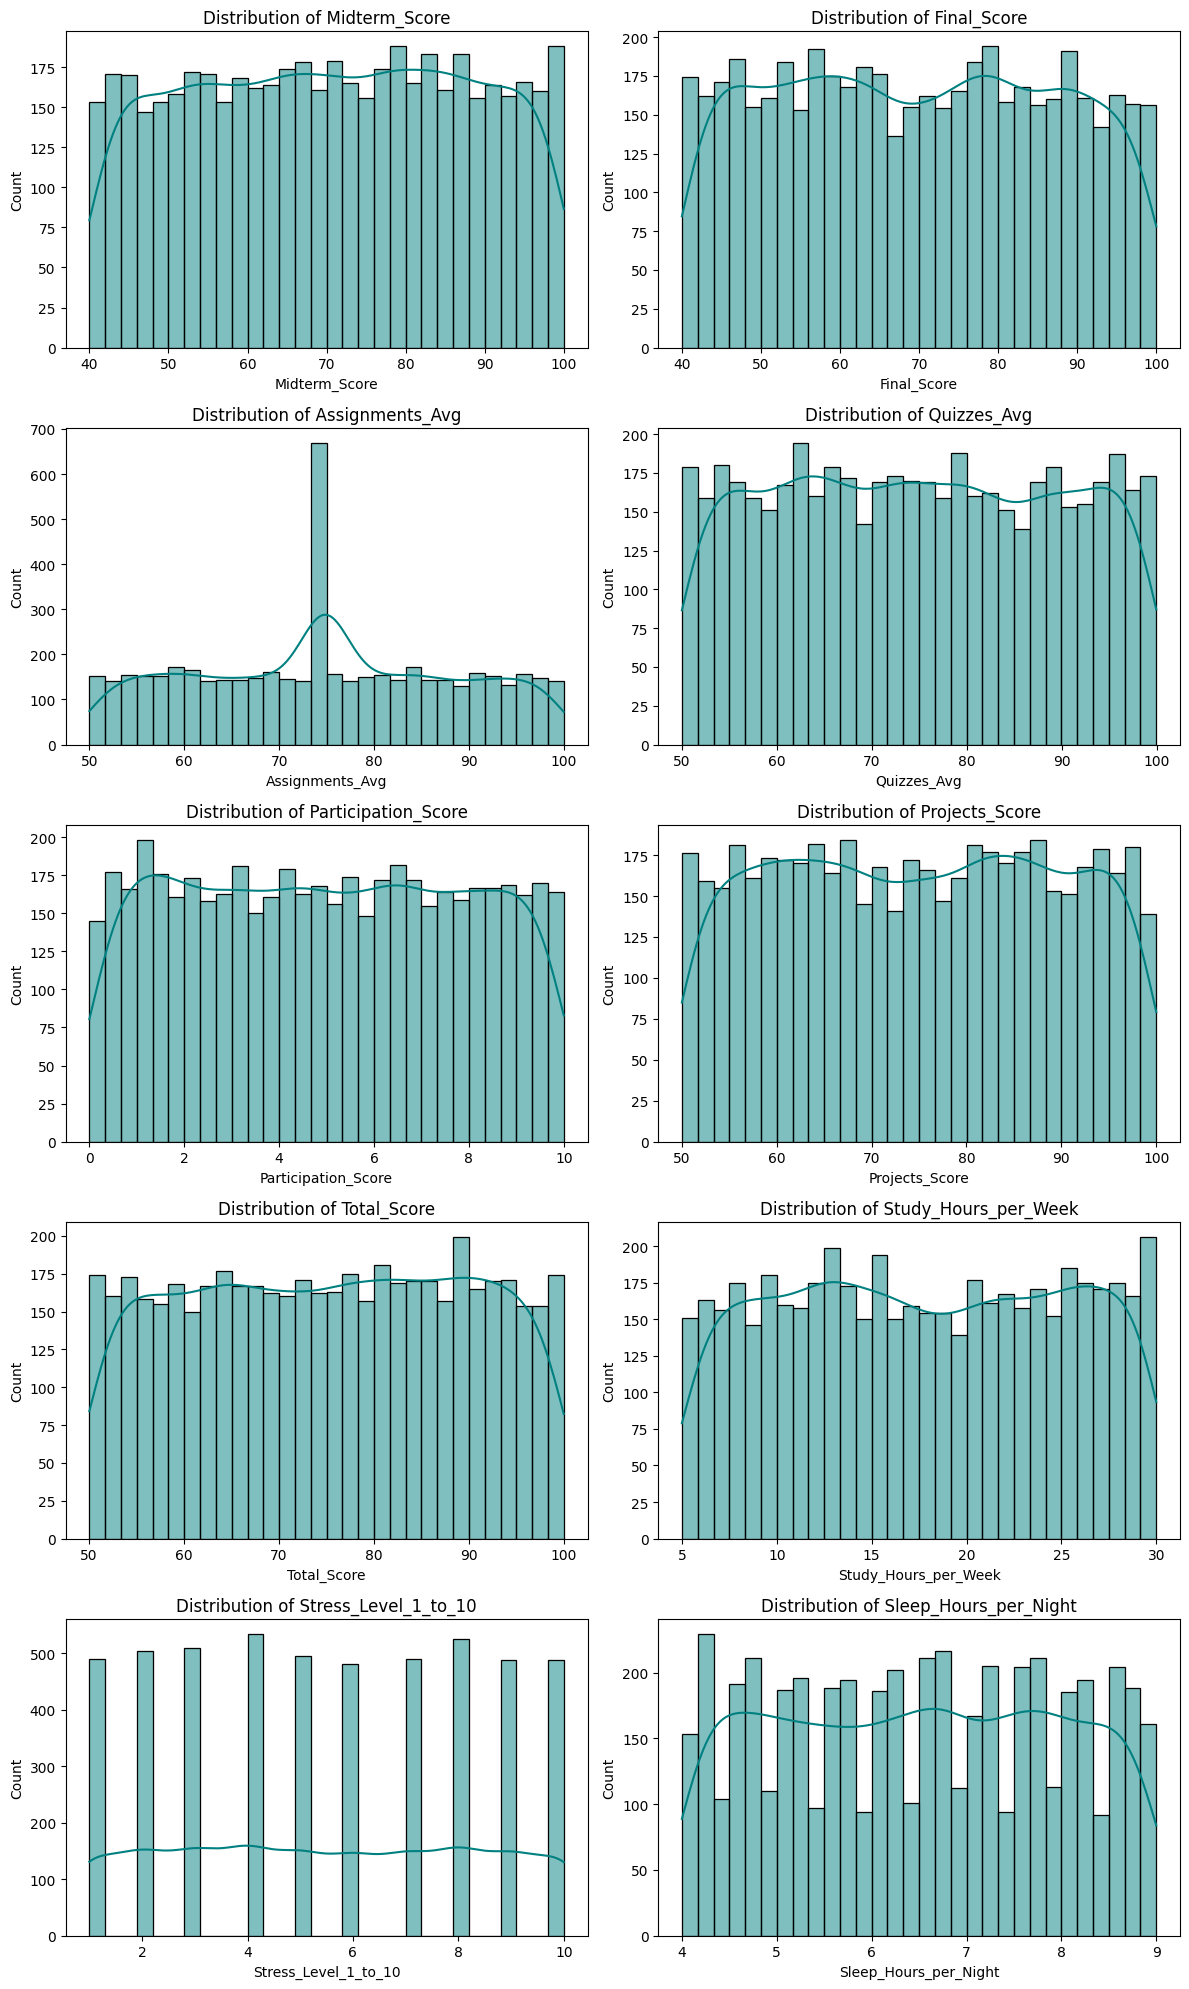

In [ ]:
num_cols = ['Midterm_Score', 'Final_Score', 'Assignments_Avg',
            'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score',
            'Study_Hours_per_Week', 'Stress_Level_1_to_10', 'Sleep_Hours_per_Night']

plt.figure(figsize=(12, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='#008080')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


### Categrical Columns.

- The categorical columns show variations in the number of values for each category:

  - **Gender**: The number of male and female students is nearly equal.  

  - **Department**: The **Computer Science** department has the highest enrollment,  
    while **Mathematics** has the lowest.  

  - **Grade**: Around **30% of students received Grade A**, while the remaining grades  
    are distributed almost equally among the other students.  

  - **Internet Access at Home**: About **90% of students have internet access at home**,  
    though the **lack of access for some students** could be a concern.  

  - **Participation in Extracurricular Activities**: Only **30% of students participate**  
    in extracurricular activities, which is **a relatively low percentage**.  

  - **Family Income Level**: Around **80% of students' families fall into the low-to-medium  
    income range**, while only **20% come from high-income families**.  

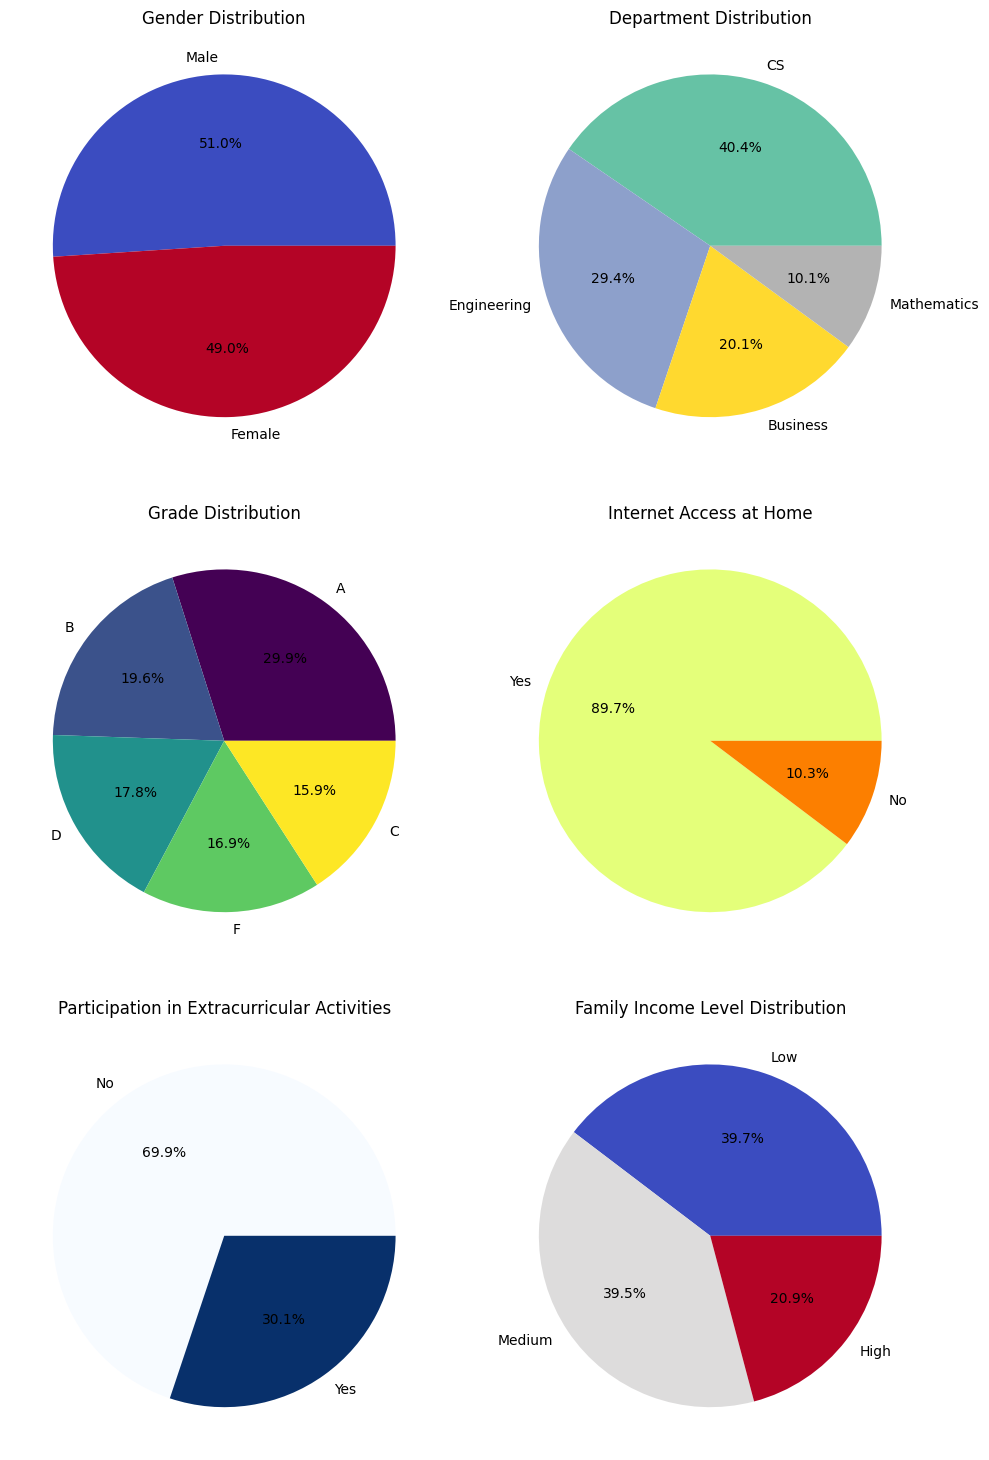

In [ ]:
plt.figure(figsize=(10, 15))

plt.subplot(3, 2, 1)
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap="coolwarm")
plt.title("Gender Distribution")
plt.ylabel("")

plt.subplot(3, 2, 2)
df['Department'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap="Set2")
plt.title("Department Distribution")
plt.ylabel("")

plt.subplot(3, 2, 3)
df['Grade'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap="viridis")
plt.title("Grade Distribution")
plt.ylabel("")

plt.subplot(3, 2, 4)
df['Internet_Access_at_Home'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap="Wistia")
plt.title("Internet Access at Home")
plt.ylabel("")

plt.subplot(3, 2, 5)
df['Extracurricular_Activities'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap="Blues")
plt.title("Participation in Extracurricular Activities")
plt.ylabel("")

plt.subplot(3, 2, 6)
df['Family_Income_Level'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap="coolwarm")
plt.title("Family Income Level Distribution")
plt.ylabel("")  # Hide y-label

plt.tight_layout()
plt.show()


## Bivariate Analysis.
This part shows relations between some pairs of related properties

In [ ]:
df.columns

Index(['Gender', 'Age', 'Department', 'Attendance', 'Midterm_Score',
       'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Family_Income_Level', 'Stress_Level_1_to_10', 'Sleep_Hours_per_Night'],
      dtype='object')

- This visualization shows the correlation between all the numeric values with each other.

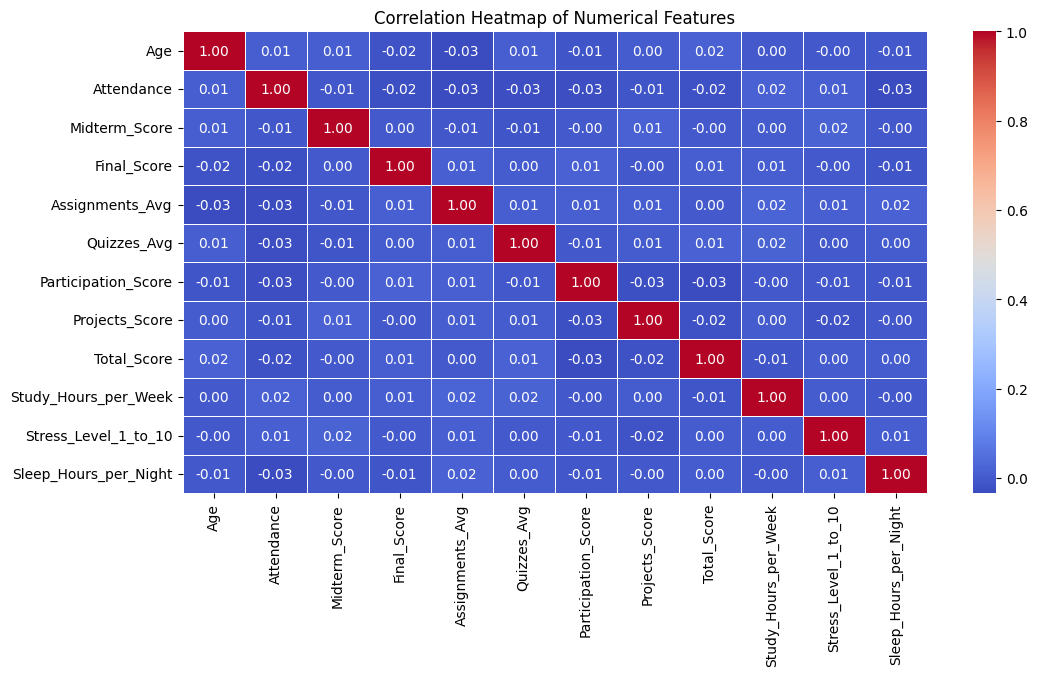

In [ ]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True,
            cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### **Let's take the properties one by one and try to extract insights and relations between columns**


#### *Relations between 'Gender' and other columns*


After analyzing the relationships between **Gender** and relevant columns (*Department, Attendance, Total Score, Study Hours per Week, Extracurricular Activities, Sleep Hours per Night, and Stress Level*), we observed the following:  

- In most aspects, **both males and females exhibit similar patterns**, with no significant differences in distribution.  
- However, a noticeable trend appears in **stress levels**—females tend to be **higher stress** more frequently, particularly in the upper ranges (8 and 9).

***Ideas***:
- try to lower the stress of girls by the increasing their awareness from teachers

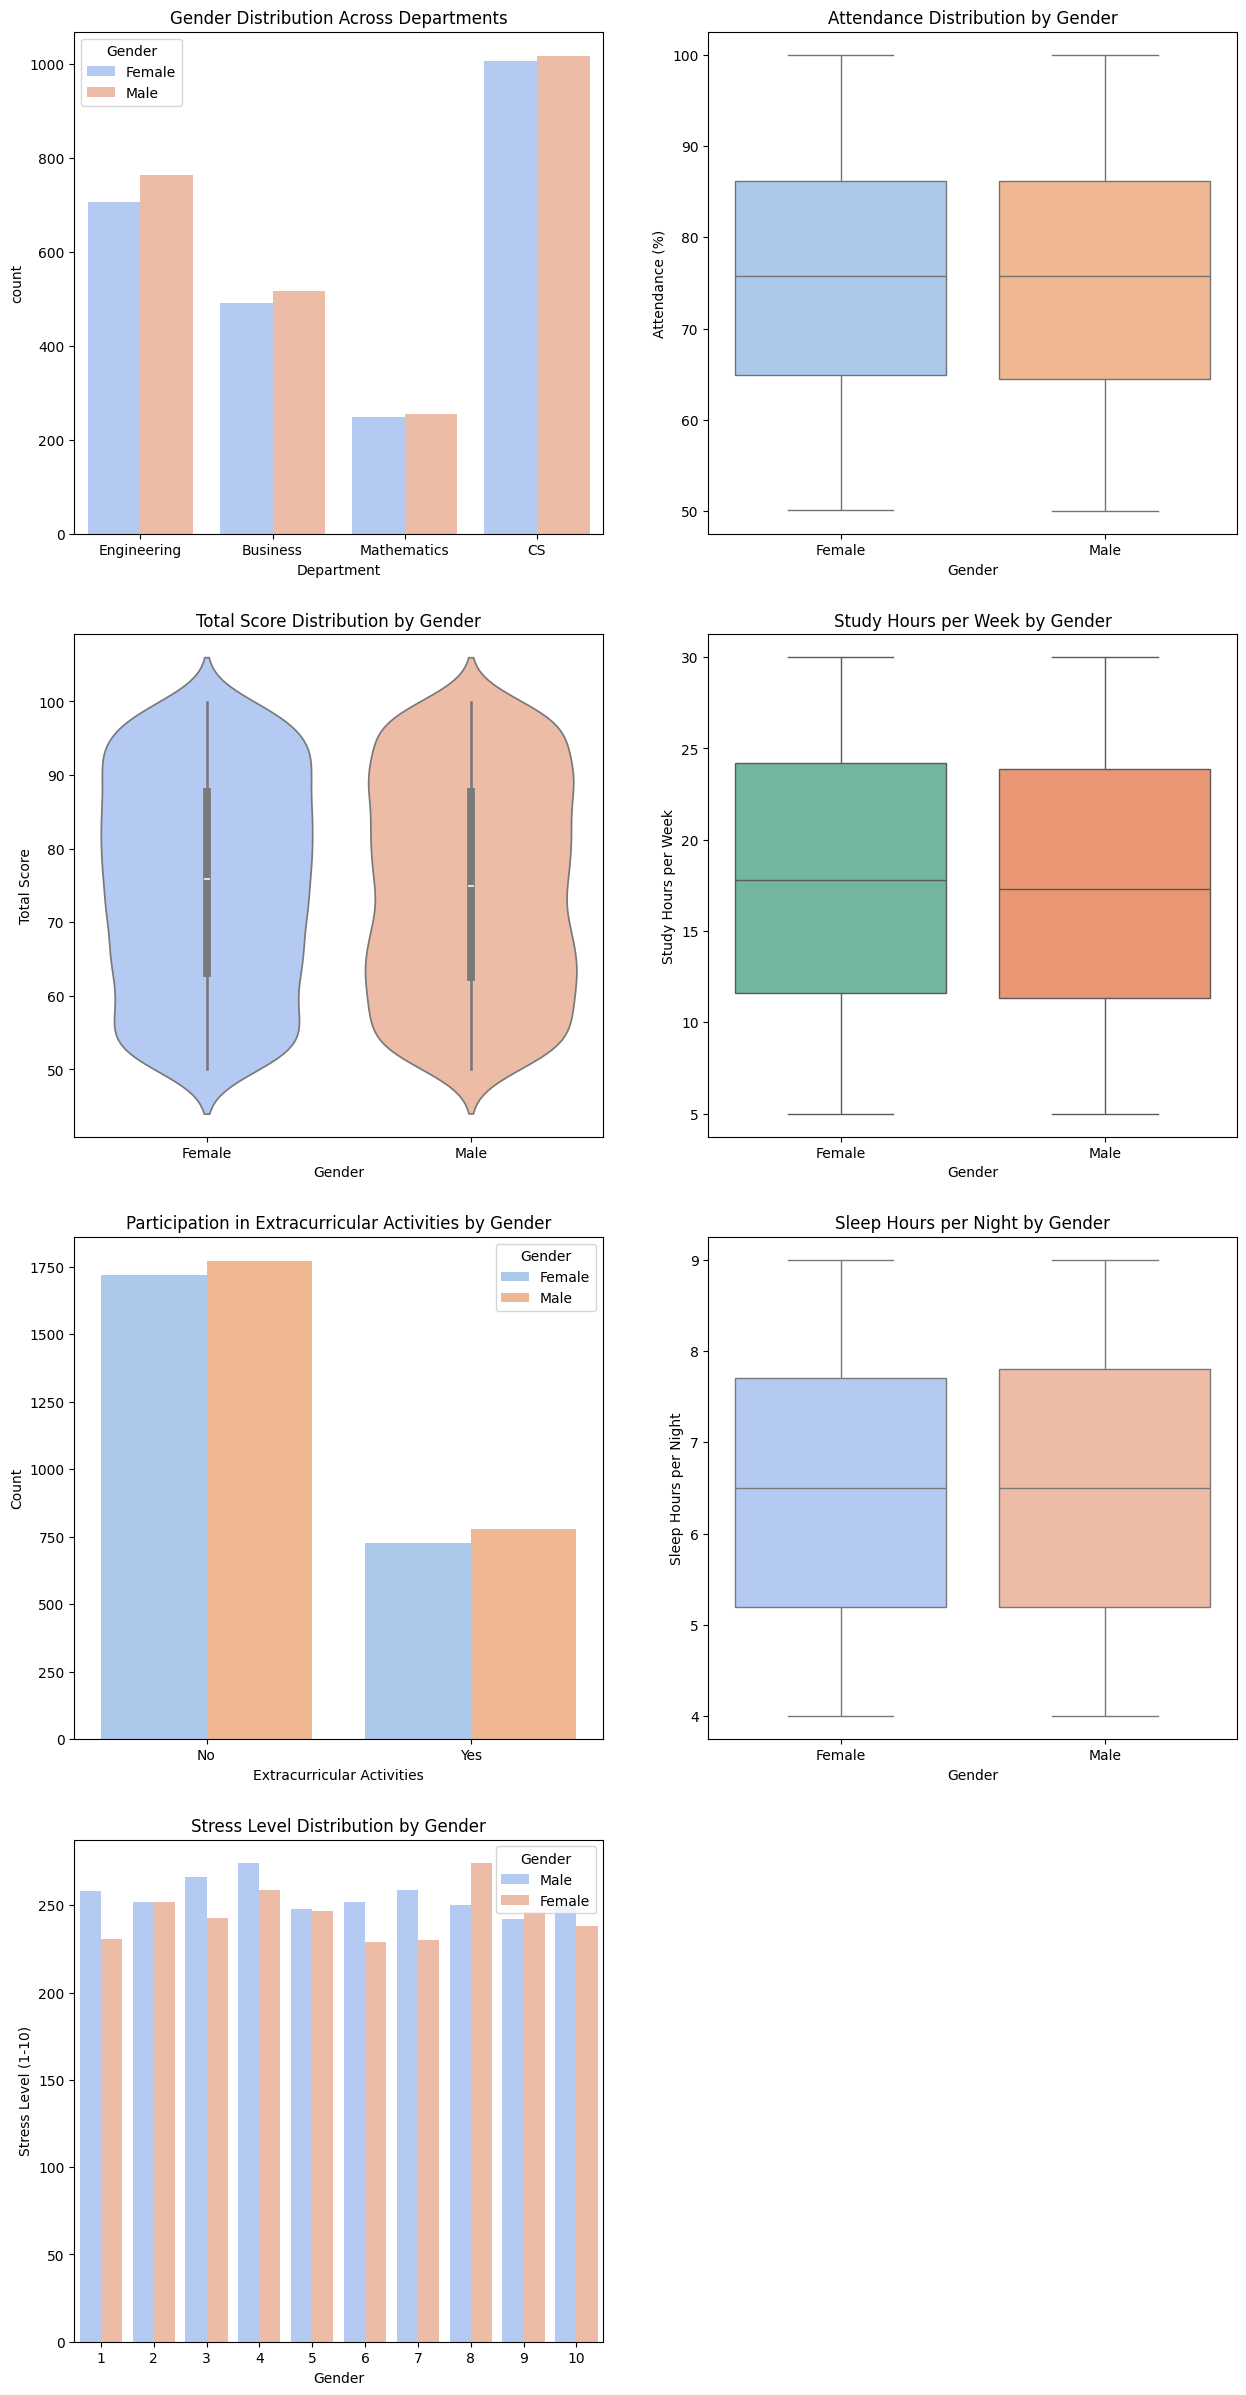

In [ ]:
plt.figure(figsize=(15, 30))

plt.subplot(4, 2, 1)
sns.countplot(x="Department", hue="Gender", data=df, palette="coolwarm")
plt.title("Gender Distribution Across Departments")
plt.xlabel("Department")

plt.subplot(4, 2, 2)
sns.boxplot(x=df['Gender'], y=df['Attendance'], palette="pastel")
plt.title("Attendance Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Attendance (%)")

plt.subplot(4, 2, 3)
sns.violinplot(x=df['Gender'], y=df['Total_Score'], palette="coolwarm")
plt.title("Total Score Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Score")

plt.subplot(4, 2, 4)
sns.boxplot(x=df['Gender'], y=df['Study_Hours_per_Week'], palette="Set2")
plt.title("Study Hours per Week by Gender")
plt.xlabel("Gender")
plt.ylabel("Study Hours per Week")

plt.subplot(4, 2, 5)
sns.countplot(x="Extracurricular_Activities", hue="Gender", data=df, palette="pastel")
plt.title("Participation in Extracurricular Activities by Gender")
plt.xlabel("Extracurricular Activities")
plt.ylabel("Count")

plt.subplot(4, 2, 6)
sns.boxplot(x=df['Gender'], y=df['Sleep_Hours_per_Night'], palette="coolwarm")
plt.title("Sleep Hours per Night by Gender")
plt.xlabel("Gender")
plt.ylabel("Sleep Hours per Night")

plt.subplot(4, 2, 7)
sns.countplot(x='Stress_Level_1_to_10', hue='Gender', data=df, palette="coolwarm")
plt.title("Stress Level Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Stress Level (1-10)")


plt.show()

I made this test to show if there is difference between the male and female in stress levels. But from the results there is no big difference between them in most of stress levels. Such that P-value > 0.05 and T-Static is near to zero

In [ ]:
from scipy.stats import ttest_ind

male_stress = df[df["Gender"] == "Male"]["Stress_Level_1_to_10"]
female_stress = df[df["Gender"] == "Female"]["Stress_Level_1_to_10"]

t_stat, p_value = ttest_ind(male_stress, female_stress)
print(f"T-Statistic: {t_stat}, P-value: {p_value}")


T-Statistic: -0.8157985414437992, P-value: 0.4146542436849052


#### Relations between '*age*' and other columns.

After analyzing the relationships between **Age** and relevant columns (*attendance, grade, extracurricular activity, study hours per week*), we observed the following:  

- *Attendance :* There is a slight difference in the distribution between ages, but the attendance percentage starts big at the first ages, decreases a little after this and increases again.
- *Total Score :* The percentage of total scores is nearly the same between all ages, but we notice that at the first year, the maximum score is lower than other years, and this maybe due to the unclear knowledge for the first year students.
- *Participation in Extracurricular activities :* we notice that these activities decreases a little at the year before the last and are bigger in middle years. This is maybe due to that the year before the last is much difficult than other year.
- *Study hours per week :* Nearly most of ages have the same distribution.



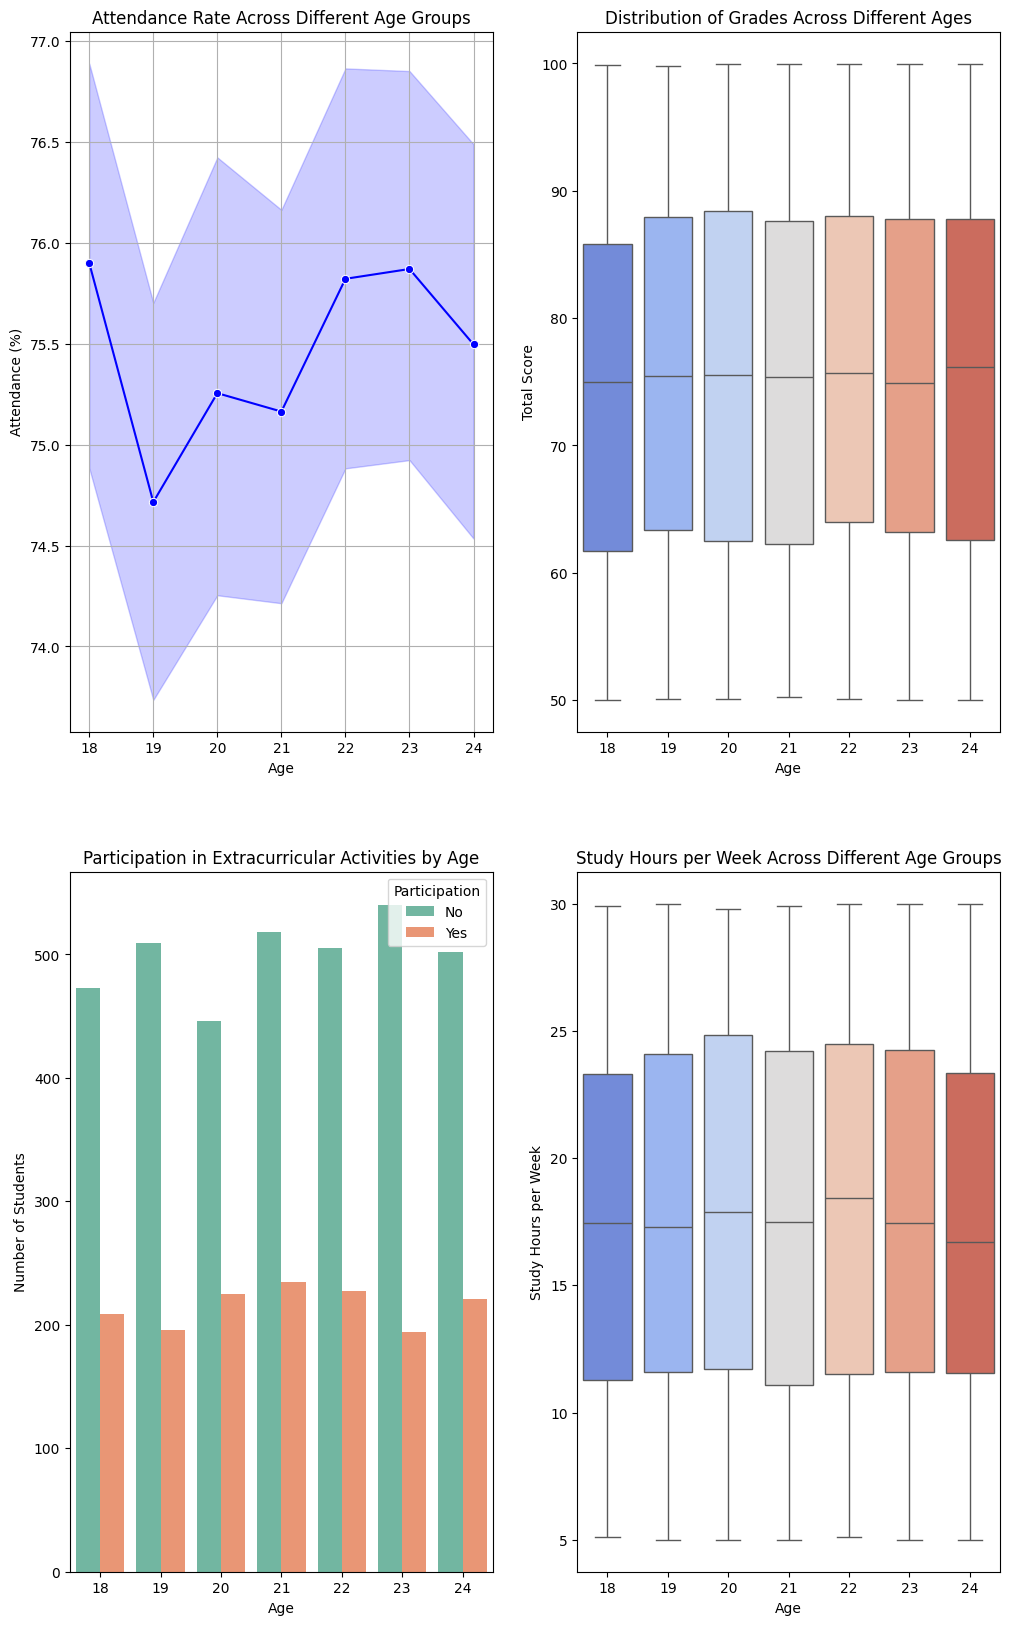

In [ ]:
plt.figure(figsize=(12, 20))

plt.subplot(2, 2, 1)
sns.lineplot(x=df["Age"], y=df["Attendance"], marker="o", color="b")
plt.xlabel("Age")
plt.ylabel("Attendance (%)")
plt.title("Attendance Rate Across Different Age Groups")
plt.grid(True)

plt.subplot(2, 2, 2)
sns.boxplot(x=df["Age"], y=df["Total_Score"], palette="coolwarm")
plt.xlabel("Age")
plt.ylabel("Total Score")
plt.title("Distribution of Grades Across Different Ages")

plt.subplot(2, 2, 3)
sns.countplot(x=df["Age"], hue=df["Extracurricular_Activities"], palette="Set2")
plt.xlabel("Age")
plt.ylabel("Number of Students")
plt.title("Participation in Extracurricular Activities by Age")
plt.legend(title="Participation", labels=["No", "Yes"])

plt.subplot(2, 2, 4)
sns.boxplot(x=df["Age"], y=df["Study_Hours_per_Week"], palette="coolwarm")

plt.title("Study Hours per Week Across Different Age Groups")
plt.xlabel("Age")
plt.ylabel("Study Hours per Week")

plt.show()

#### Relations between '*Department*' and other columns.

- *Attendance:* There is no significant difference in attendance across different departments, which is a positive aspect.  
- *Family Income:* Students from **high-income families** tend to prefer the Engineering department over others.  
- *Participation Score:* The highest participation scores are observed in the Mathematics department, suggesting that other departments could learn from the teaching strategies used in this field.  
- *Stress Level:* Stress levels are notably higher in both the **Business** and **Computer Science** departments, highlighting the need to investigate the underlying causes.


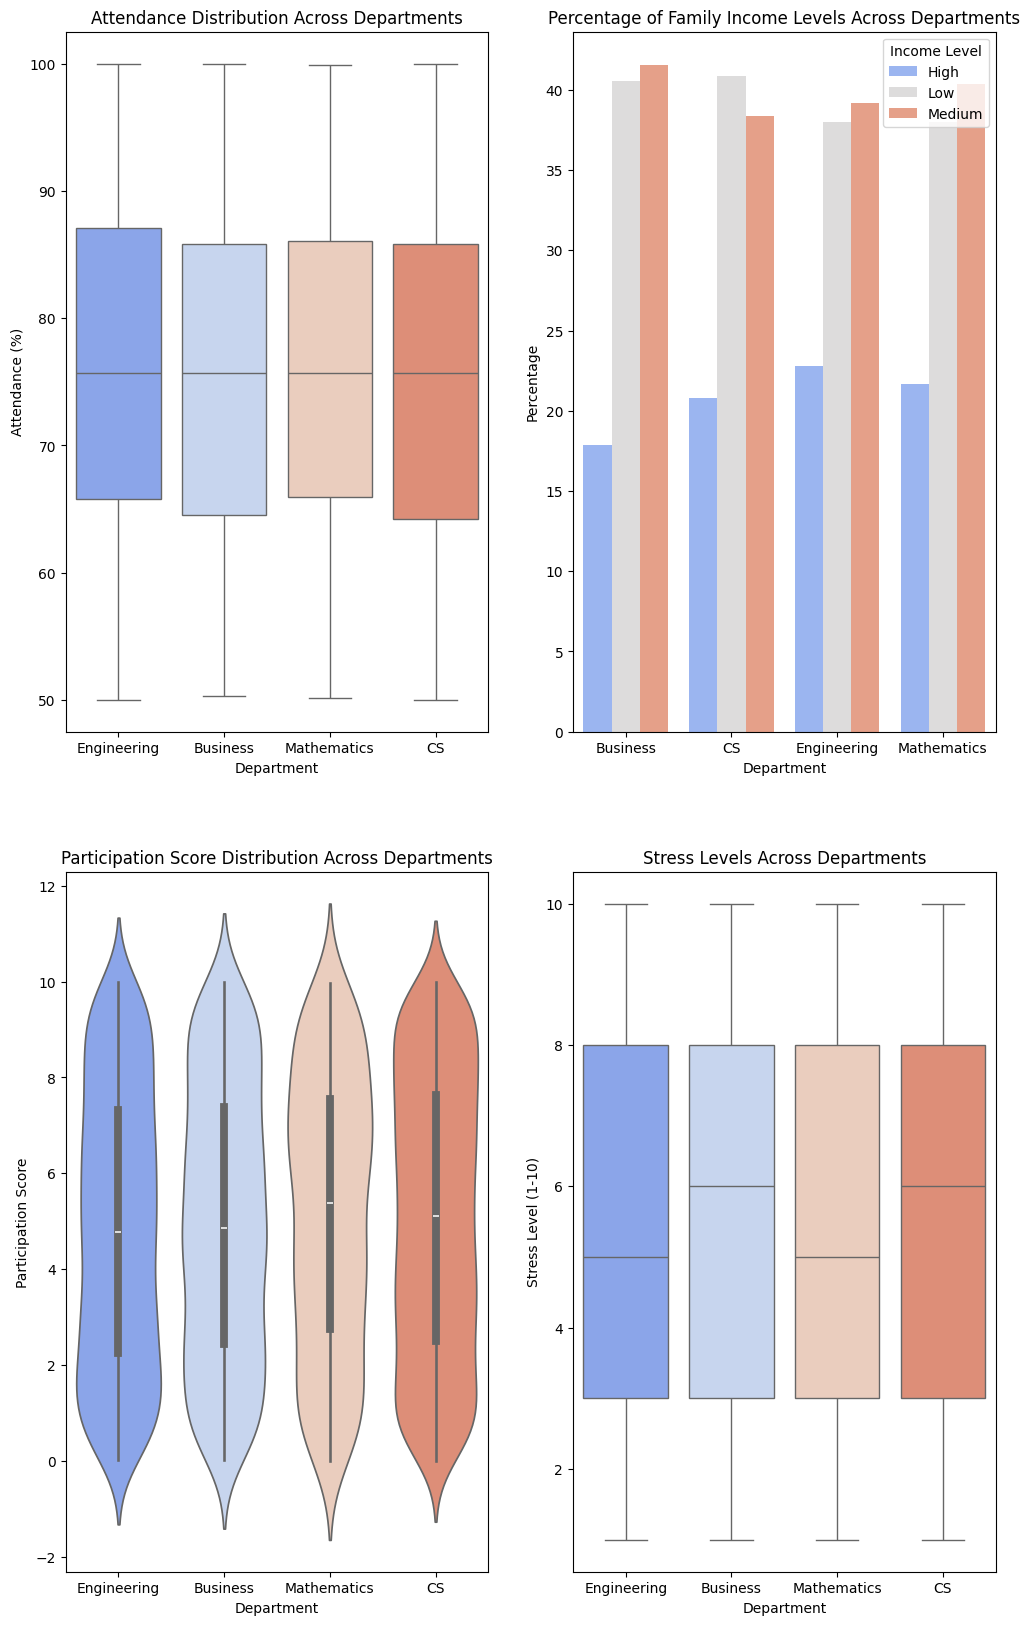

In [ ]:
plt.figure(figsize=(12, 20))

plt.subplot(2, 2, 1)
sns.boxplot(x=df["Department"], y=df["Attendance"], palette="coolwarm")
plt.title("Attendance Distribution Across Departments")
plt.xlabel("Department")
plt.ylabel("Attendance (%)")

plt.subplot(2, 2, 2)
# Compute normalized percentages
income_department_counts = df.groupby(["Department", "Family_Income_Level"]).size().reset_index(name="Count")
total_per_department = income_department_counts.groupby("Department")["Count"].transform("sum")
income_department_counts["Percentage"] = (income_department_counts["Count"] / total_per_department) * 100

sns.barplot(data=income_department_counts, x="Department", y="Percentage", hue="Family_Income_Level", palette="coolwarm")
plt.title("Percentage of Family Income Levels Across Departments")
plt.xlabel("Department")
plt.ylabel("Percentage")
plt.legend(title="Income Level", loc="upper right")

plt.subplot(2, 2, 3)
sns.violinplot(x=df["Department"], y=df["Participation_Score"], palette="coolwarm")
plt.title("Participation Score Distribution Across Departments")
plt.xlabel("Department")
plt.ylabel("Participation Score")

plt.subplot(2, 2, 4)
sns.boxplot(x=df["Department"], y=df["Stress_Level_1_to_10"], palette="coolwarm")
plt.title("Stress Levels Across Departments")
plt.xlabel("Department")
plt.ylabel("Stress Level (1-10)")



plt.show()

#### Relations between '*Attendance*' and other columns.

- *Grades:* A strong correlation is observed between attendance and grades—students with higher attendance tend to achieve better grades.  
- *Study Hours per Week:* Most students study for a similar number of hours each week. However, those who attend classes regularly tend to secure higher grades despite studying the same amount as those with lower attendance.  

***Ideas:*** Encourage students to attend classes regularly, as it significantly improves their grades without requiring additional study hours compared to those who attend less frequently.


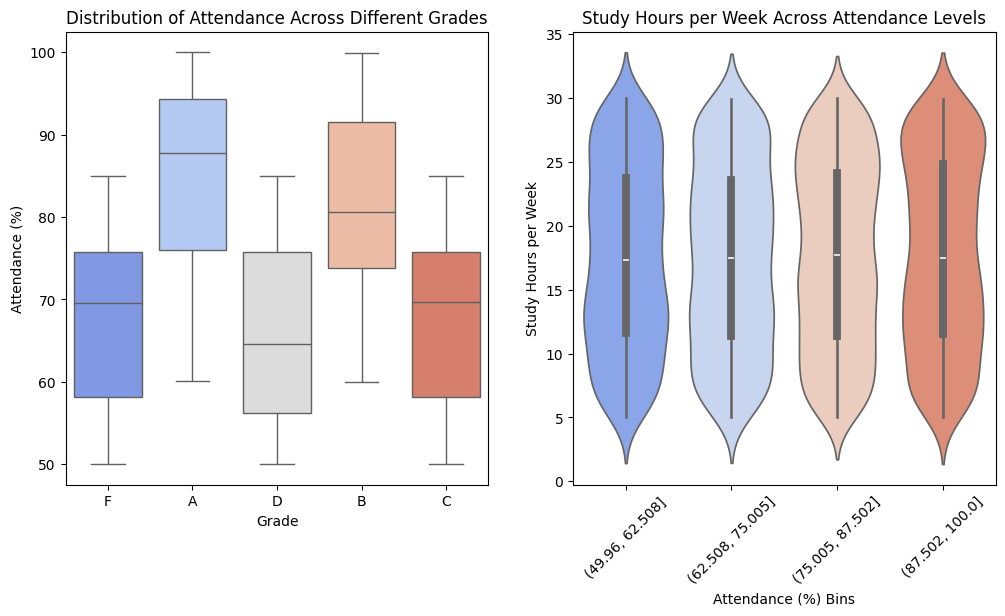

In [ ]:
plt.figure(figsize=(12, 20))

plt.subplot(3, 2, 1)
sns.boxplot(x="Grade", y="Attendance", data=df, palette="coolwarm")
plt.title("Distribution of Attendance Across Different Grades")
plt.xlabel("Grade")
plt.ylabel("Attendance (%)")


plt.subplot(3, 2, 2)
sns.violinplot(x=pd.cut(df["Attendance"], bins=4),
               y=df["Study_Hours_per_Week"], palette="coolwarm")
plt.title("Study Hours per Week Across Attendance Levels")
plt.xlabel("Attendance (%) Bins")
plt.ylabel("Study Hours per Week")
plt.xticks(rotation=45)

plt.show()

#### Relations between '*Family Income*' and other columns.


- *Stress Level:* We observe that stress levels are highest among students from middle-income families.  
- *Internet Access:* The visualization indicates no direct relationship between family income and internet access, as all income levels have nearly the same percentage of internet availability.


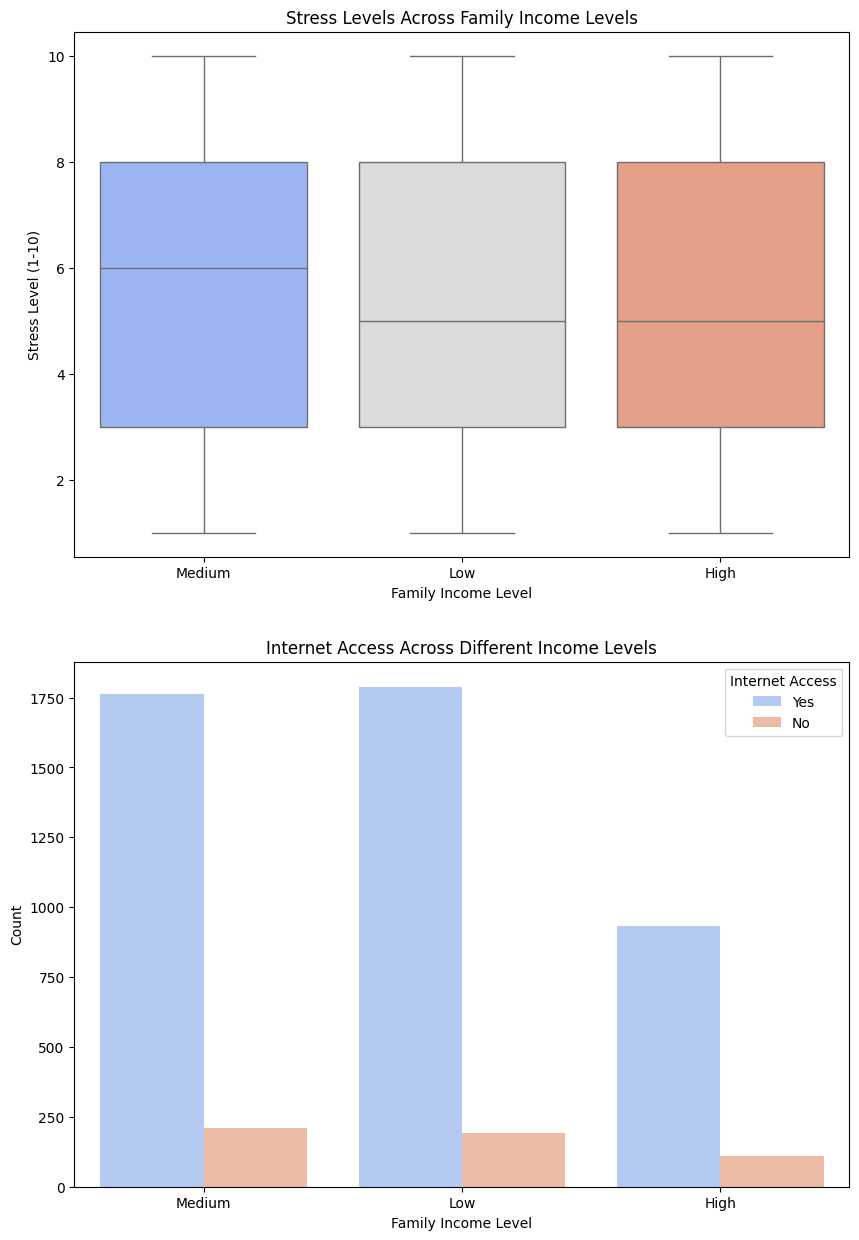

In [ ]:
plt.figure(figsize=(10, 15))

plt.subplot(2, 1, 1)
sns.boxplot(x="Family_Income_Level", y="Stress_Level_1_to_10",
            data=df, palette="coolwarm")
plt.title("Stress Levels Across Family Income Levels")
plt.xlabel("Family Income Level")
plt.ylabel("Stress Level (1-10)")

plt.subplot(2, 1, 2)
sns.countplot(x="Family_Income_Level", hue="Internet_Access_at_Home",
              data=df, palette="coolwarm")
plt.title("Internet Access Across Different Income Levels")
plt.xlabel("Family Income Level")
plt.ylabel("Count")
plt.legend(title="Internet Access")



plt.show()

#### Relations between '*Stress*' and other columns.

- *Study Hours per Week:* We notice that there is no clear relationship between stress levels and the number of study hours per week, as the data shows fluctuations.  
- *Grades:* Students who achieved **Grade A** or **Grade B** tend to have higher stress levels compared to others, but their stress is not extremely high.

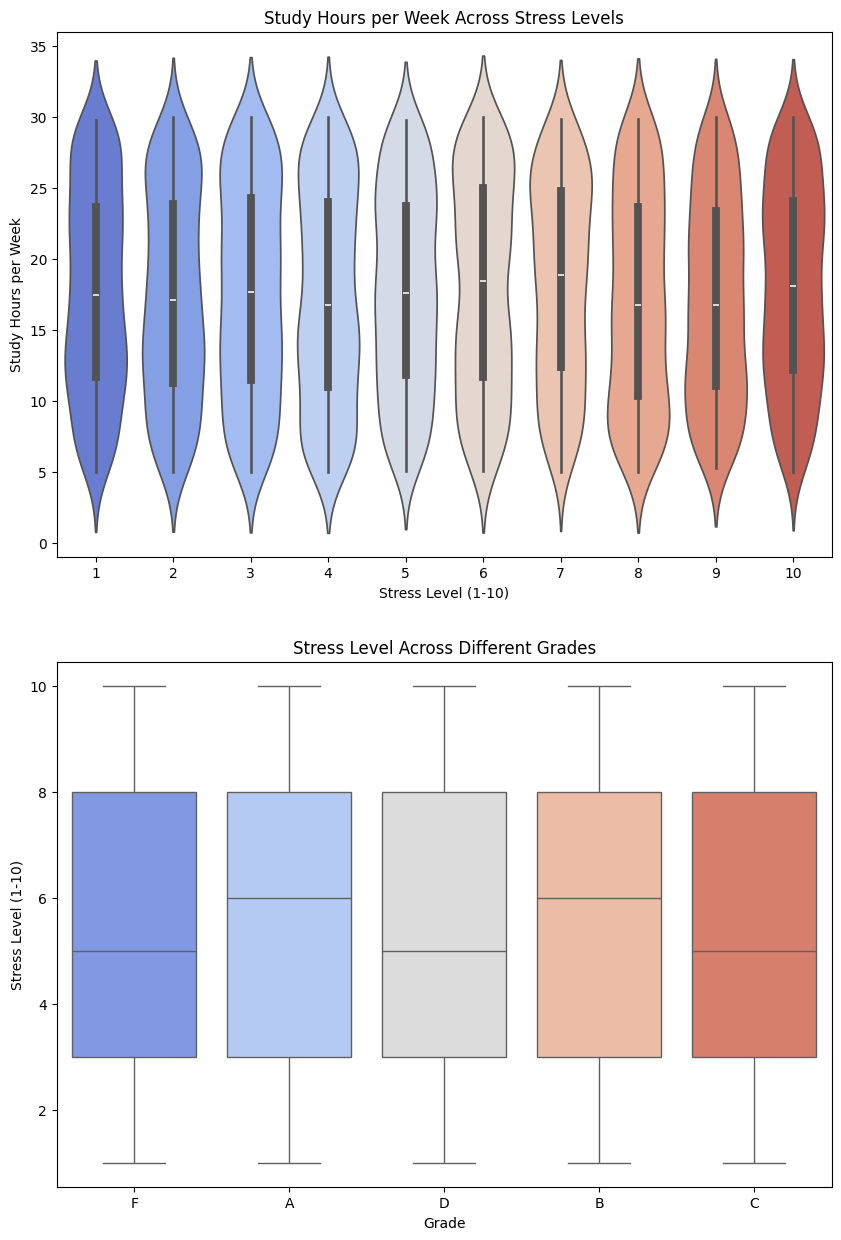

In [ ]:
plt.figure(figsize=(10, 15))

plt.subplot(2, 1, 1)
sns.violinplot(x=df["Stress_Level_1_to_10"], y=df["Study_Hours_per_Week"],
               palette="coolwarm")
plt.title("Study Hours per Week Across Stress Levels")
plt.xlabel("Stress Level (1-10)")
plt.ylabel("Study Hours per Week")


plt.subplot(2, 1, 2)
sns.boxplot(x=df["Grade"], y=df["Stress_Level_1_to_10"], palette="coolwarm")
plt.title("Stress Level Across Different Grades")
plt.xlabel("Grade")
plt.ylabel("Stress Level (1-10)")

plt.show()

#### Relations between '*Grades*' and '*Study hours per week*'.

- For this visualization we notice that there is no relation between Grades and number of studying hours per week.
- We notice that students that got **grade A** study the same number of hours like students who got **grade F**.

*Ideas :* Let students notice that the grade doesn't increase by the increase of number of studying hours, but how to study.

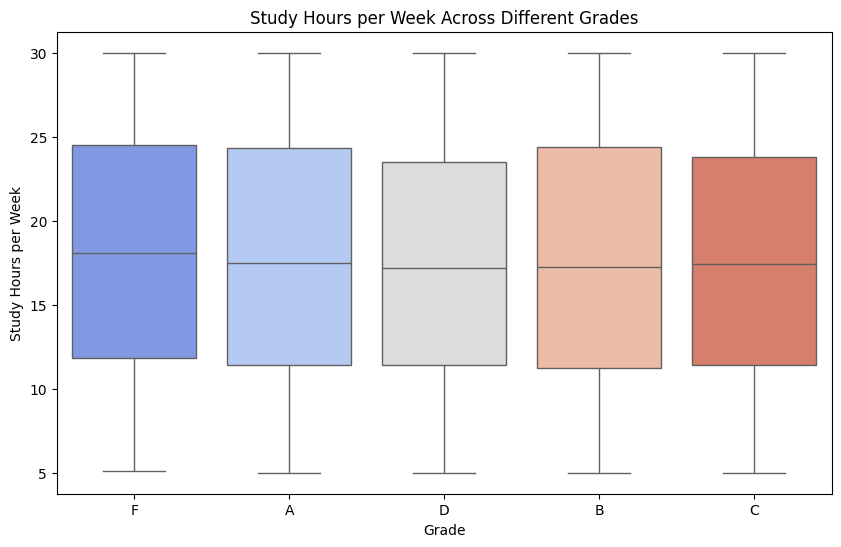

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Grade"], y=df["Study_Hours_per_Week"],
            palette="coolwarm")
plt.title("Study Hours per Week Across Different Grades")
plt.xlabel("Grade")
plt.ylabel("Study Hours per Week")
plt.show()


## Multivariate Analysis.
This part shows relations between many columns at the same time.

### Stress, Sleep Hours & Grade.

It is shown that Most of studenst who got High Grades slept about 6 to 7 hourse and were not much stressed.

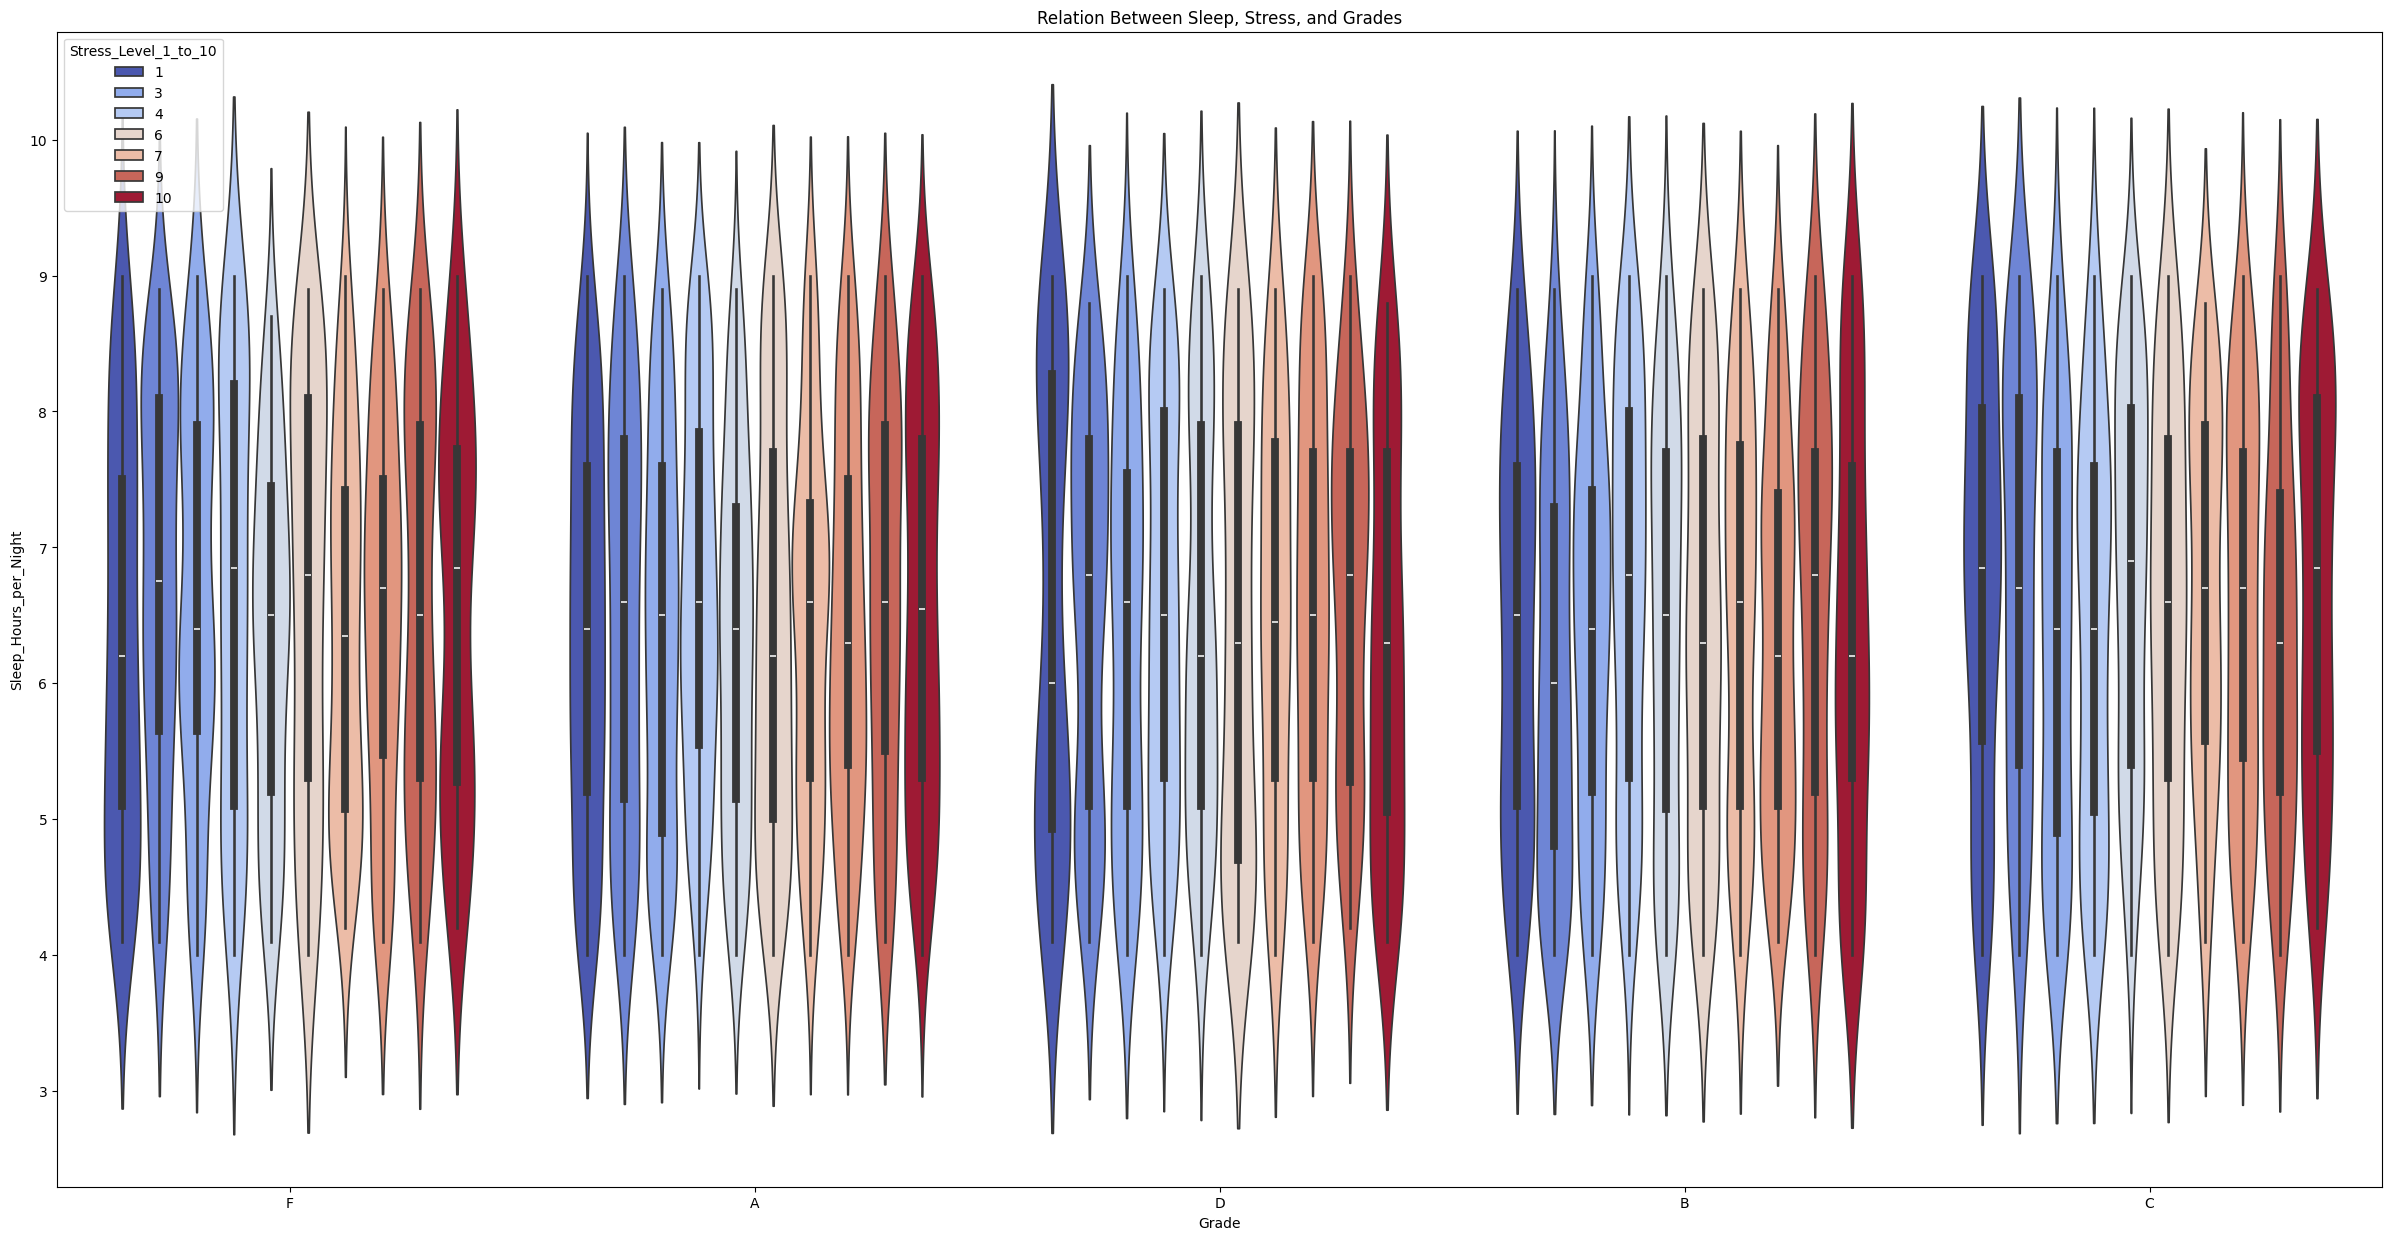

In [ ]:
plt.figure(figsize=(30,15))
sns.violinplot(x="Grade", y="Sleep_Hours_per_Night",
               hue="Stress_Level_1_to_10", data=df, palette="coolwarm")
plt.title("Relation Between Sleep, Stress, and Grades")
plt.show()


### Family income, Internet Access & Total Score.

We note that the absense of internet access doesn't affect the scores of students, so the internet is not a big deal in the process of getting high degrees, and it is not a sign for the high income family, such that the biggest percentage for the absense of internet is found in the high income families.

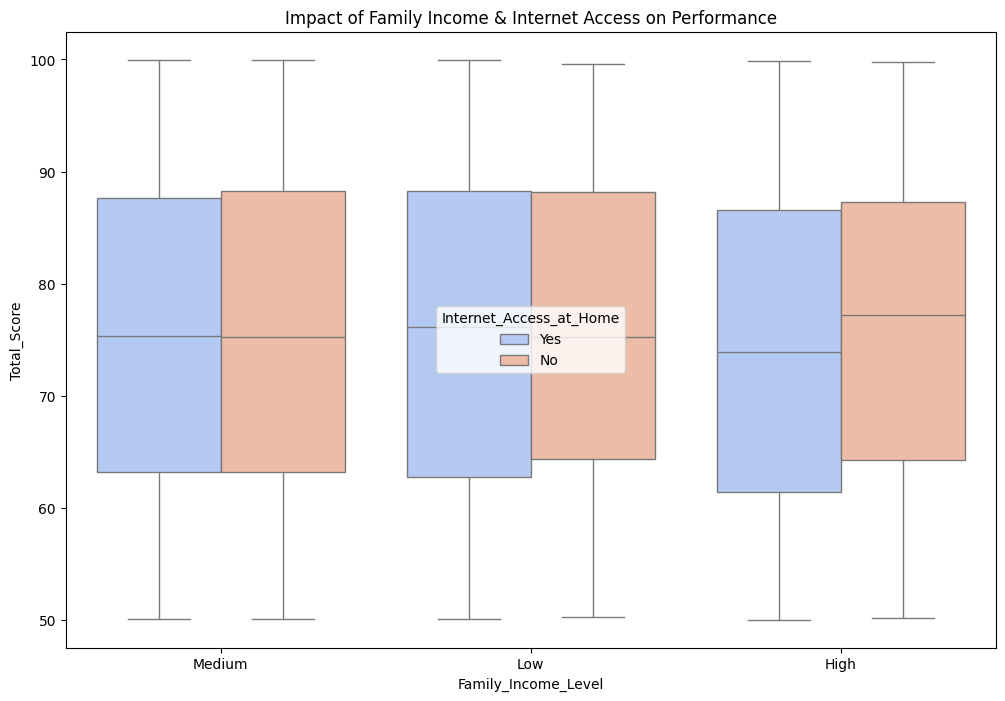

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Family_Income_Level", y="Total_Score",
            hue="Internet_Access_at_Home", data=df, palette="coolwarm")
plt.title("Impact of Family Income & Internet Access on Performance")
plt.show()


### Relation between some columns taking **Grade** inconsideration.

we notice that the biggest effect in getting high ***Grade*** is the attendance. The more you attend the more you got highest degrees.

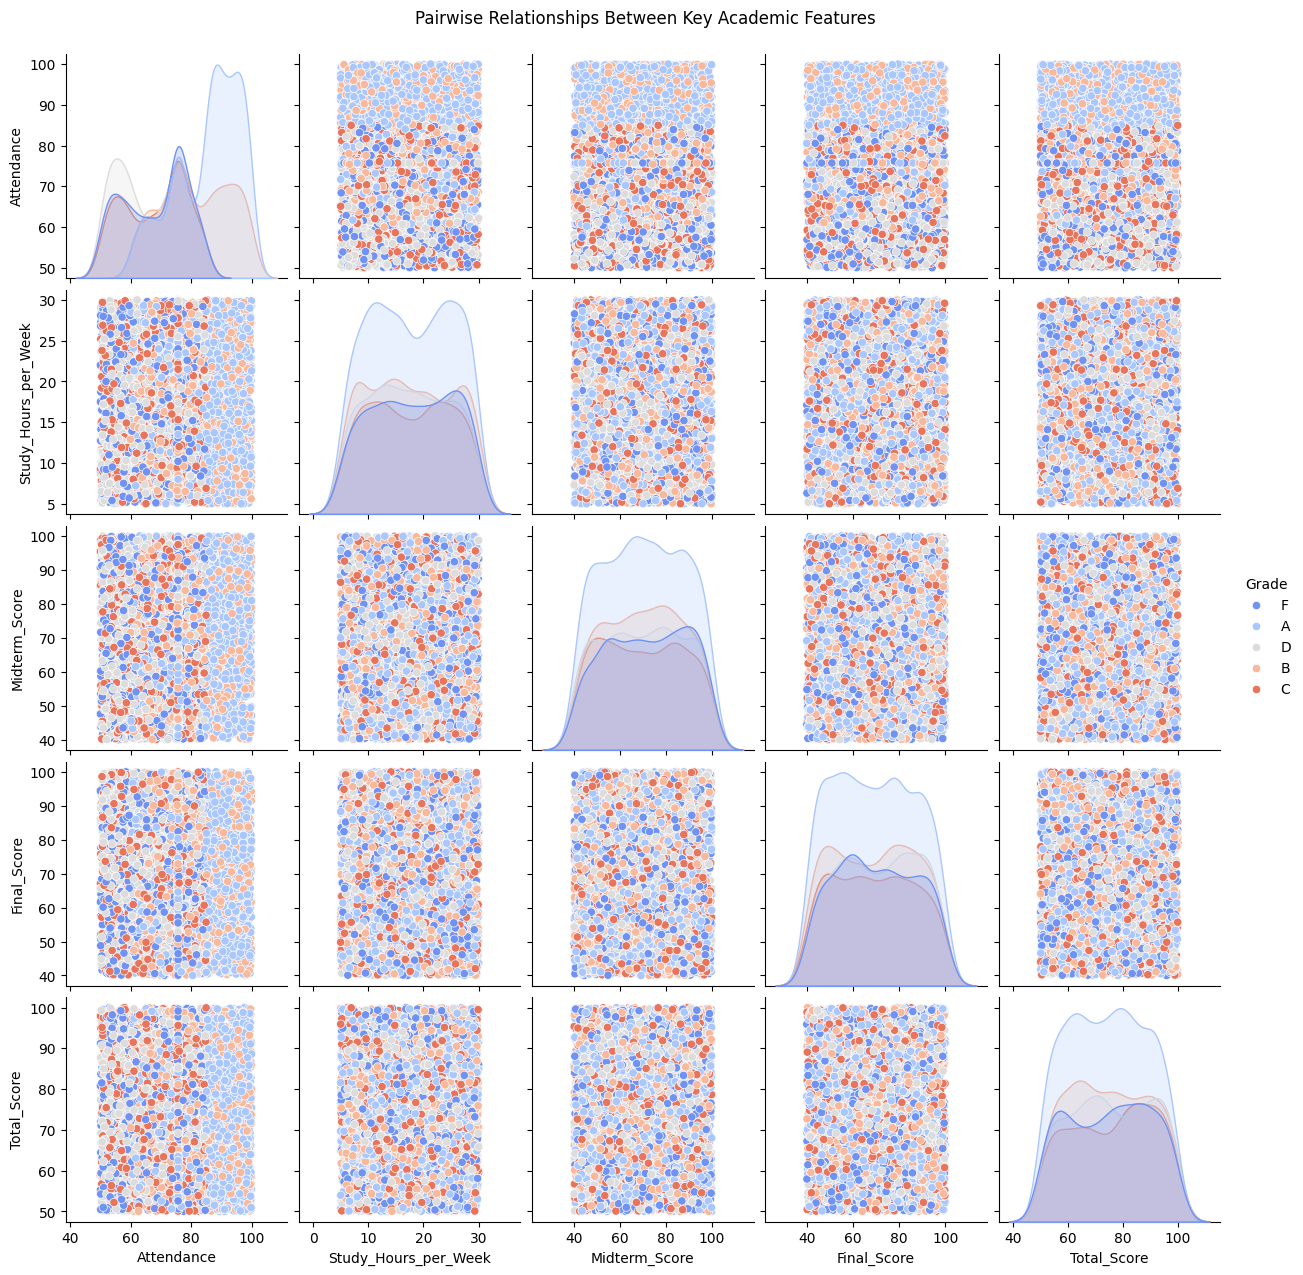

In [ ]:
sns.pairplot(df, vars=["Attendance", "Study_Hours_per_Week", "Midterm_Score",
                       "Final_Score", "Total_Score"], hue="Grade", palette="coolwarm")
plt.suptitle("Pairwise Relationships Between Key Academic Features", y=1.02)
plt.show()


### Study hours, sleep hours, & stress level.

We notice that the lowest degree of stress found when you take enough hours of sleep (from 6 to 8) and study for enough hours per week (30 and above).

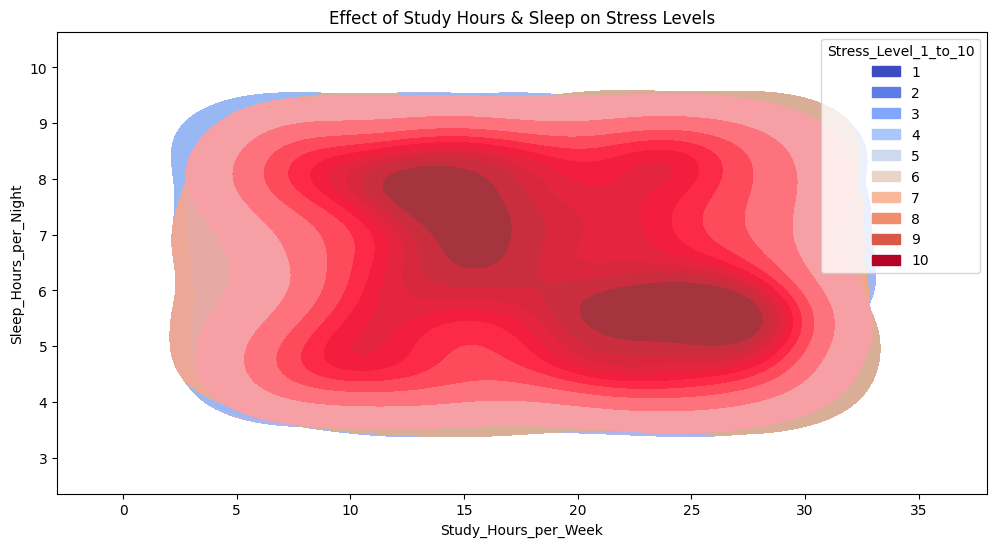

In [ ]:
plt.figure(figsize=(12,6))
sns.kdeplot(x=df["Study_Hours_per_Week"], y=df["Sleep_Hours_per_Night"],
            hue=df["Stress_Level_1_to_10"], fill=True, palette="coolwarm")
plt.title("Effect of Study Hours & Sleep on Stress Levels")
plt.show()


### Attendance, Hours studied per week, & Grades.

It is noticed that the students who attend more got the highest degrees even if they study the same hours like other students.

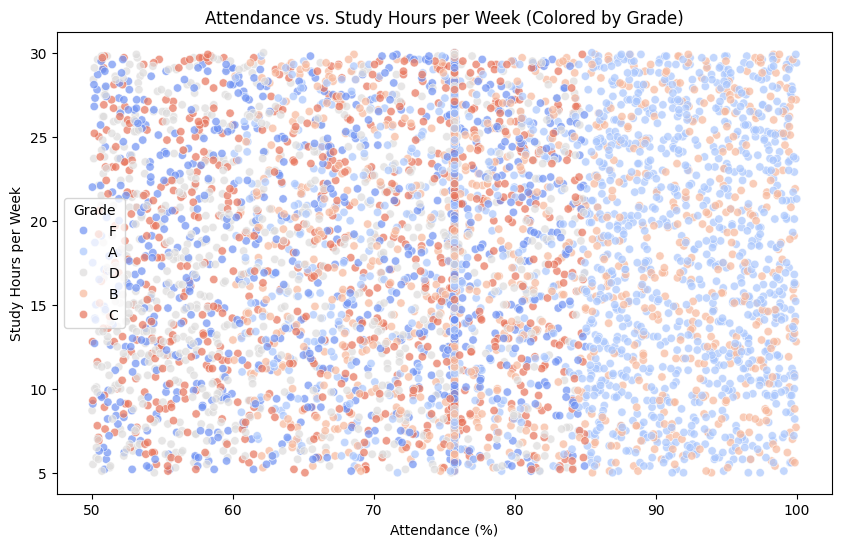

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="Attendance",
    y="Study_Hours_per_Week",
    hue="Grade",
    palette="coolwarm",
    alpha=0.7
)
plt.title("Attendance vs. Study Hours per Week (Colored by Grade)")
plt.xlabel("Attendance (%)")
plt.ylabel("Study Hours per Week")
plt.legend(title="Grade")
plt.show()